Faster Color Extraction

In [1]:
import cv2
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [2]:
import cv2
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

# Predefined color profile (normalized for calculation)
color_profile = {
    'Yellow': np.array([255, 255, 0]),
    'Orange': np.array([255, 165, 0]),
    'Red': np.array([255, 0, 0]),
    'Violet': np.array([238, 130, 238]),
    'Blue': np.array([0, 0, 255]),
    'Green': np.array([0, 255, 0]),
    'Black': np.array([0, 0, 0]),
    'White': np.array([255, 255, 255]),
    'Brown': np.array([165, 42, 42]),
}

# color_profile = {
#     'Red': np.array([255, 0, 0]),
#     'Green': np.array([0, 255, 0]),
#     'Blue': np.array([0, 0, 255]),
#     'Yellow': np.array([255, 255, 0]),
#     'Cyan': np.array([0, 255, 255]),
#     'Magenta': np.array([255, 0, 255]),
#     'Orange': np.array([255, 165, 0]),
#     'Violet': np.array([138, 43, 226]),
#     'Pink': np.array([255, 192, 203]),
    
#     # Neutral & Gray shades
#     'White': np.array([255, 255, 255]),
#     'Black': np.array([0, 0, 0]),
#     'Gray': np.array([128, 128, 128]),
#     'Dark Gray': np.array([64, 64, 64]),
#     'Light Gray': np.array([192, 192, 192]),
#     'Brown': np.array([139, 69, 19]),
#     'Beige': np.array([245, 222, 179]),
    
#     # Special highlight colors
#     'Gold': np.array([255, 215, 0]),
#     'Skin Tone Light': np.array([255, 224, 189]),
#     'Skin Tone Medium': np.array([210, 180, 140]),
#     'Skin Tone Dark': np.array([139, 69, 19]),
#     'Teal': np.array([0, 128, 128]),
#     'Turquoise': np.array([64, 224, 208]),
    
#     # Neon highlights (for glowing effects in thumbnails)
#     'Neon Blue': np.array([0, 191, 255]),
#     'Neon Green': np.array([57, 255, 20]),
#     'Neon Pink': np.array([255, 20, 147])
# }


# Convert color profile for faster computation
color_names = list(color_profile.keys())
color_array = np.array(list(color_profile.values()))

# Function to calculate the proportion of each predefined color in an image
def calculate_color_proportions(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Downscale the image for faster computation
    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_AREA)
    pixels = image.reshape(-1, 3)

    # Compute distances in a vectorized manner
    distances = np.linalg.norm(pixels[:, None] - color_array[None, :], axis=2)
    closest_colors = np.argmin(distances, axis=1)

    # Count occurrences of each color
    unique, counts = np.unique(closest_colors, return_counts=True)
    color_counts = dict(zip(unique, counts))

    # Calculate proportions
    total_pixels = len(pixels)
    color_proportions = {color_names[i]: (color_counts.get(i, 0) / total_pixels) * 100 for i in range(len(color_names))}

    return color_proportions

# Function to display the color proportions as a bar chart with the thumbnail
def display_color_proportions_with_thumbnail(color_proportions, image_path, title):
    colors = list(color_proportions.keys())
    proportions = list(color_proportions.values())

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

   # Bar chart
    axs[0].bar(
        colors, 
        proportions, 
        color=np.array(list(color_profile.values())) / 255, 
        edgecolor=['black' if color == 'White' else 'none' for color in colors]  # Black border for the White bar
    )
    axs[0].set_title(title)
    axs[0].set_xlabel('Colors')
    axs[0].set_ylabel('Proportion (%)')

    # Thumbnail
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[1].imshow(img)
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Set the path to the folder containing the images
image_folder = 'Final_Clustering/thumbnails-filtered'  # Replace with the path to your images


image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Save results to CSV
with open('final_color_extraction.csv', mode='w', newline='') as file:              # Change the filename as needed
    writer = csv.writer(file)
    writer.writerow(['Name'] + list(color_profile.keys()))

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        color_proportions = calculate_color_proportions(image_path)

        writer.writerow([image_file] + [round(color_proportions[color], 2) for color in color_profile.keys()])

        # display_color_proportions_with_thumbnail(color_proportions, image_path, f"Color Proportions for {image_file}")

print("Processing complete. Results saved to 'final_color_extraction.csv'.")        # Change the filename as needed


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Final_Clustering/thumbnails-filtered'

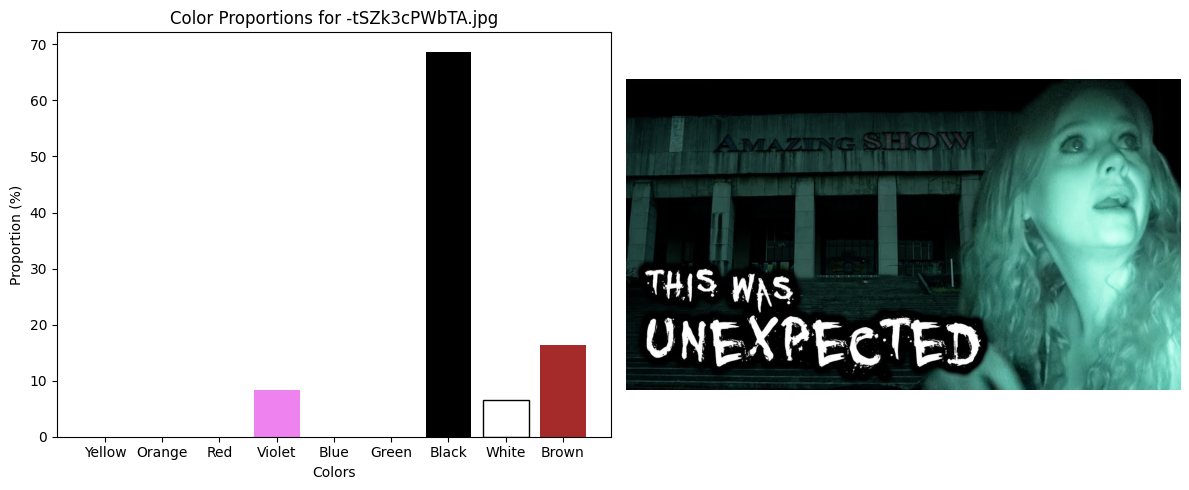

In [9]:
image_folder = '../../Thumbnails_New_Data/thumbnails-filtered' 

# Function to find the image file by video ID
def find_image_by_video_id(video_id, image_folder):
    for fname in os.listdir(image_folder):
        if video_id in fname and fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            return os.path.join(image_folder, fname)
    return None

# Set your video ID here
video_id = "tSZk3cPWbTA"  # Change this to your desired video ID

# Find the image file
image_path = find_image_by_video_id(video_id, image_folder)

if image_path:
    # Calculate color proportions
    color_proportions = calculate_color_proportions(image_path)
    # Display the bar plot and thumbnail
    display_color_proportions_with_thumbnail(
        color_proportions,
        image_path,
        f"Color Proportions for -{os.path.basename(image_path)}"
    )
else:
    print(f"No image found for video ID: {video_id}")